In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras import  layers
import keras
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
#load data
#4000 米 的
path = 'D:\ML_data_sql\\2022数模美赛选拔赛\\all'
data5 = pd.read_excel(os.path.join(path,'all9.xlsx'),engine='openpyxl')
df2= data5.drop(data5.columns[[9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,-2,-1]], axis=1)
df2 = df2.fillna(df2.mean())
# print(np.any(df2.isnull())) 
df2_index = pd.period_range('1994-01',periods=df2.shape[0],freq='M')
df2 = df2.drop(df2.columns[[0,4,5]],axis=1)
df2.index = df2_index
# #数据处理结束
df2.head()

,海拔高度(m),经度,纬度,平均气温(℃),平均最高气温(℃),平均最低气温(℃),平均气温≤0℃的天数,平均风速(knots),平均最大持续风速(knots),单日最大平均风速(knots)
1994-01,2755,-1.016667,-89,-46.325688,-44.050254,-48.508986,0,9.302834,11.794453,19.17004
1994-02,2755,-1.016667,-89,-46.325688,-44.050254,-48.508986,0,9.302834,11.794453,19.17004
1994-03,2755,-1.016667,-89,-46.325688,-44.050254,-48.508986,0,9.302834,11.794453,19.17004
1994-04,2755,-1.016667,-89,-46.325688,-44.050254,-48.508986,0,9.302834,11.794453,19.17004
1994-05,2755,-1.016667,-89,-46.325688,-44.050254,-48.508986,0,9.302834,11.794453,19.17004


In [3]:
#归一化处理
from sklearn.preprocessing import MinMaxScaler

vis = df2['平均气温(℃)'].values


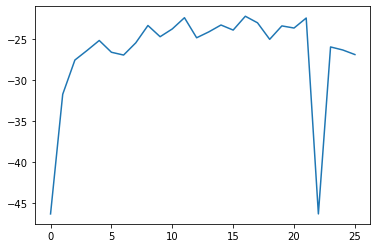

In [4]:
one =[]
for i in range(0,len(vis),12):
    one.append(vis[i])

means =(np.sum(one)-one[5])/(len(one)-1)
one[5] = means
plt.plot(one)
plt.savefig('all9_jan_all.png')
plt.show()


In [5]:
vis = vis.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(vis)
# print(scaled_data)
scaled_data_series = scaled_data.reshape(-1,1)
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix][-1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [6]:
scaled_data_series.shape

(311, 1)

In [7]:
raw_seq = scaled_data_series

# choose a number of time steps
#设置步长
n_steps = 12

# split into samples
X, y = split_sequence(raw_seq, n_steps)


In [8]:
print(X.shape,y.shape)

(299, 12, 1) (299,)


In [9]:

train_data = X[:-24]
test_data = X[-24:]

train_y = y[:-24]
test_y = y[-24:]

y1 = np.arange(1,train_data.shape[0]+1) 
y2 = np.arange(train_data.shape[0],train_data.shape[0]+test_data.shape[0])

# plt.plot(y1, train_data, 'r', y2, test_data, 'b')
# plt.show()

In [10]:
train_data.shape

(275, 12, 1)

Epoch 1/100
138/138 - 0s - loss: 0.0954
Epoch 2/100
138/138 - 0s - loss: 0.0478
Epoch 3/100
138/138 - 0s - loss: 0.0344
Epoch 4/100
138/138 - 0s - loss: 0.0163
Epoch 5/100
138/138 - 0s - loss: 0.0133
Epoch 6/100
138/138 - 0s - loss: 0.0134
Epoch 7/100
138/138 - 0s - loss: 0.0137
Epoch 8/100
138/138 - 0s - loss: 0.0135
Epoch 9/100
138/138 - 0s - loss: 0.0120
Epoch 10/100
138/138 - 0s - loss: 0.0112
Epoch 11/100
138/138 - 0s - loss: 0.0126
Epoch 12/100
138/138 - 0s - loss: 0.0131
Epoch 13/100
138/138 - 0s - loss: 0.0108
Epoch 14/100
138/138 - 0s - loss: 0.0134
Epoch 15/100
138/138 - 0s - loss: 0.0120
Epoch 16/100
138/138 - 0s - loss: 0.0105
Epoch 17/100
138/138 - 0s - loss: 0.0114
Epoch 18/100
138/138 - 0s - loss: 0.0108
Epoch 19/100
138/138 - 0s - loss: 0.0111
Epoch 20/100
138/138 - 0s - loss: 0.0106
Epoch 21/100
138/138 - 0s - loss: 0.0104
Epoch 22/100
138/138 - 0s - loss: 0.0104
Epoch 23/100
138/138 - 0s - loss: 0.0106
Epoch 24/100
138/138 - 0s - loss: 0.0108
Epoch 25/100
138/138 - 0s

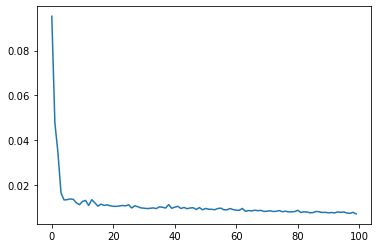

In [11]:
n_features = 1
train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], n_features)
test_data = test_data.reshape(test_data.shape[0], test_data.shape[1], n_features)
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history = model.fit(train_data, train_y, epochs=100, batch_size=2, verbose=2)
plt.plot(history.history['loss'])
plt.savefig('loss')
plt.show()

In [12]:
predictions = model.predict(test_data, verbose=2)
train_pre = model.predict(train_data,verbose=2)
predictions = predictions.reshape(predictions.shape[0])
print(predictions.shape, test_y.shape)

1/1 - 0s
9/9 - 0s
(24,) (24,)


In [13]:
show_data = np.hstack((train_y,test_y))
print(len(show_data))
print(train_pre.shape,predictions.shape)
train_pre = train_pre.squeeze()
pre_data = np.hstack((train_pre,predictions))
print(pre_data.shape)

299
(275, 1) (24,)
(299,)


In [14]:
pre_18 = pre_data
pre_18.shape,predictions.shape

((299,), (24,))

In [15]:
# predict = np.hstack((pre_18, predictions))
# predict.shape
predict = pre_18.reshape(-1,1)
pre_train,_ =split_sequence(predict,12)
pre_2022 = model.predict(pre_train,verbose=2)

9/9 - 0s


In [16]:
pre_2022 = pre_2022.reshape(-1,1)
pre_train,_ =split_sequence(pre_2022,12)
pre_2023 = model.predict(pre_train,verbose=2)

9/9 - 0s


In [17]:
pre_2023 = pre_2023.reshape(-1,1)
pre_train,_ =split_sequence(pre_2023,12)
pre_2024 = model.predict(pre_train,verbose=2)

9/9 - 0s


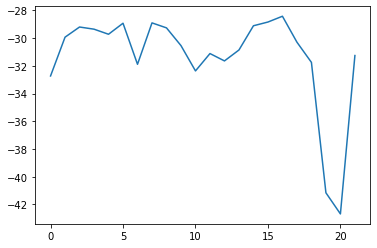

[array([-32.730156], dtype=float32),
 array([-29.933506], dtype=float32),
 array([-29.199652], dtype=float32),
 array([-29.35572], dtype=float32),
 array([-29.721687], dtype=float32),
 array([-28.927612], dtype=float32),
 array([-31.887396], dtype=float32),
 array([-28.901636], dtype=float32),
 array([-29.261705], dtype=float32),
 array([-30.54162], dtype=float32),
 array([-32.366062], dtype=float32),
 array([-31.11394], dtype=float32),
 array([-31.644514], dtype=float32),
 array([-30.856686], dtype=float32),
 array([-29.109407], dtype=float32),
 array([-28.84013], dtype=float32),
 array([-28.422873], dtype=float32),
 array([-30.293005], dtype=float32),
 array([-31.750422], dtype=float32),
 array([-41.15543], dtype=float32),
 array([-42.6795], dtype=float32),
 array([-31.256552], dtype=float32)]

In [18]:
pre_2024_real = scaler.inverse_transform(pre_2024)
aaa = []
for i in range(0,len(pre_2024_real),12):
    aaa.append(pre_2024_real[i])

plt.plot(aaa)
plt.show()
aaa

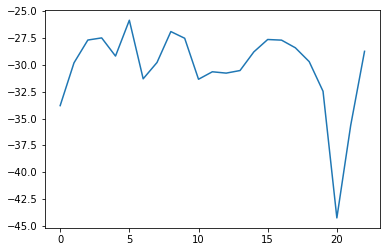

[array([-33.79432], dtype=float32),
 array([-29.808449], dtype=float32),
 array([-27.687214], dtype=float32),
 array([-27.487377], dtype=float32),
 array([-29.180325], dtype=float32),
 array([-25.844013], dtype=float32),
 array([-31.296743], dtype=float32),
 array([-29.776875], dtype=float32),
 array([-26.898764], dtype=float32),
 array([-27.521223], dtype=float32),
 array([-31.338053], dtype=float32),
 array([-30.642113], dtype=float32),
 array([-30.76696], dtype=float32),
 array([-30.526854], dtype=float32),
 array([-28.78922], dtype=float32),
 array([-27.637108], dtype=float32),
 array([-27.69565], dtype=float32),
 array([-28.40828], dtype=float32),
 array([-29.696686], dtype=float32),
 array([-32.455883], dtype=float32),
 array([-44.248898], dtype=float32),
 array([-35.631798], dtype=float32),
 array([-28.737167], dtype=float32)]

In [19]:
pre_2023_real = scaler.inverse_transform(pre_2023)
# print(pre_2022_real)
# plt.plot(pre_2022_real)
# plt.show()
aaa = []
for i in range(0,len(pre_2023_real),12):
    aaa.append(pre_2023_real[i])

plt.plot(aaa)
plt.show()
aaa

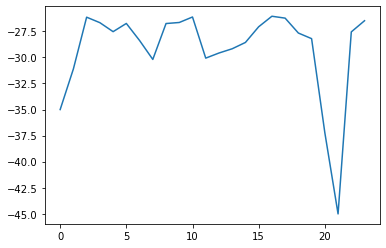

[array([-35.0035], dtype=float32),
 array([-31.099867], dtype=float32),
 array([-26.137253], dtype=float32),
 array([-26.664202], dtype=float32),
 array([-27.526272], dtype=float32),
 array([-26.738174], dtype=float32),
 array([-28.374168], dtype=float32),
 array([-30.190767], dtype=float32),
 array([-26.746096], dtype=float32),
 array([-26.646454], dtype=float32),
 array([-26.11862], dtype=float32),
 array([-30.06621], dtype=float32),
 array([-29.576506], dtype=float32),
 array([-29.16796], dtype=float32),
 array([-28.561634], dtype=float32),
 array([-27.057438], dtype=float32),
 array([-26.046734], dtype=float32),
 array([-26.228302], dtype=float32),
 array([-27.65815], dtype=float32),
 array([-28.197006], dtype=float32),
 array([-37.22201], dtype=float32),
 array([-45.01893], dtype=float32),
 array([-27.54921], dtype=float32),
 array([-26.47631], dtype=float32)]

In [20]:
pre_2022_real = scaler.inverse_transform(pre_2022)
# print(pre_2022_real)
# plt.plot(pre_2022_real)
# plt.show()
aaa = []
for i in range(0,len(pre_2022_real),12):
    aaa.append(pre_2022_real[i])

plt.plot(aaa)
plt.show()
aaa


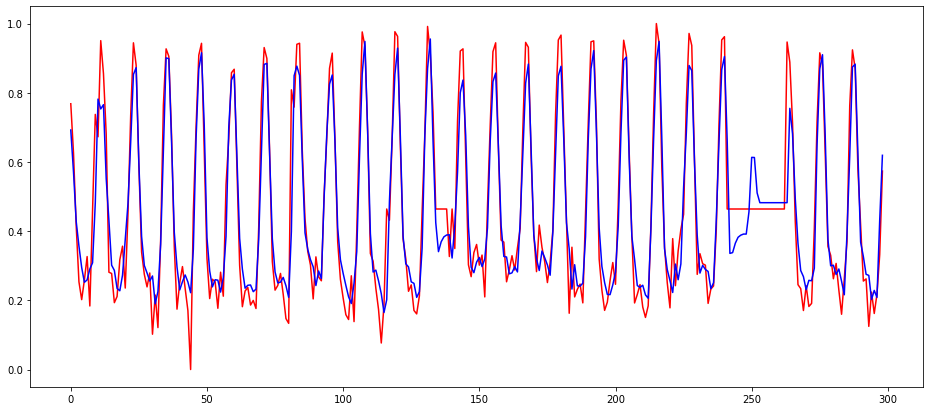

In [21]:
fig = plt.figure(figsize=(16, 7))
plt.plot(range(len(show_data)), show_data,'r',range(len(show_data)),pre_data,'b')
# plt.savefig('all1.png')
plt.show()

In [22]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (train_data.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
history2 = regressor.fit(train_data, train_y, epochs=100, batch_size=2, verbose=2)

Epoch 1/100
138/138 - 1s - loss: 0.0815
Epoch 2/100
138/138 - 1s - loss: 0.0599
Epoch 3/100
138/138 - 1s - loss: 0.0316
Epoch 4/100
138/138 - 1s - loss: 0.0295
Epoch 5/100
138/138 - 1s - loss: 0.0183
Epoch 6/100
138/138 - 1s - loss: 0.0210
Epoch 7/100
138/138 - 1s - loss: 0.0195
Epoch 8/100
138/138 - 2s - loss: 0.0189
Epoch 9/100
138/138 - 2s - loss: 0.0171
Epoch 10/100
138/138 - 2s - loss: 0.0169
Epoch 11/100
138/138 - 2s - loss: 0.0147
Epoch 12/100
138/138 - 1s - loss: 0.0160
Epoch 13/100
138/138 - 2s - loss: 0.0167
Epoch 14/100
138/138 - 2s - loss: 0.0158
Epoch 15/100
138/138 - 1s - loss: 0.0144
Epoch 16/100
138/138 - 1s - loss: 0.0162
Epoch 17/100
138/138 - 2s - loss: 0.0179
Epoch 18/100
138/138 - 2s - loss: 0.0143
Epoch 19/100
138/138 - 3s - loss: 0.0162
Epoch 20/100
138/138 - 5s - loss: 0.0124
Epoch 21/100
138/138 - 4s - loss: 0.0135
Epoch 22/100
138/138 - 3s - loss: 0.0148
Epoch 23/100
138/138 - 3s - loss: 0.0144
Epoch 24/100
138/138 - 3s - loss: 0.0137
Epoch 25/100
138/138 - 2s

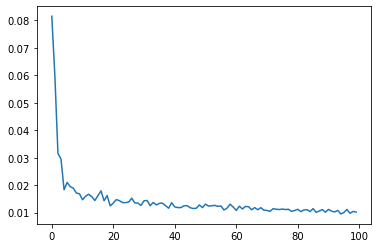

In [24]:
plt.plot(history2.history['loss'])
plt.savefig('loss_big.png')
plt.show()

In [25]:
predictions2 = regressor.predict(test_data, verbose=2)
train_pre2 = regressor.predict(train_data,verbose=2)
predictions2 = predictions2.reshape(predictions.shape[0])
train_pre2 = train_pre2.squeeze()
pre_data2 = np.hstack((train_pre2,predictions2))

1/1 - 0s
9/9 - 0s


In [26]:
predict2 = pre_data2
# predict.shape
predict2 = predict2.reshape(-1,1)
pre_train2,_ =split_sequence(predict2,12)
pre_2022_2= regressor.predict(pre_train2,verbose=2)

9/9 - 0s


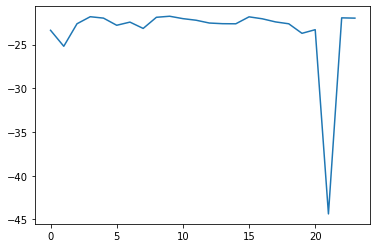

[array([-23.372547], dtype=float32),
 array([-25.200686], dtype=float32),
 array([-22.626945], dtype=float32),
 array([-21.822008], dtype=float32),
 array([-21.9811], dtype=float32),
 array([-22.800093], dtype=float32),
 array([-22.4384], dtype=float32),
 array([-23.160458], dtype=float32),
 array([-21.887148], dtype=float32),
 array([-21.767557], dtype=float32),
 array([-22.04091], dtype=float32),
 array([-22.223494], dtype=float32),
 array([-22.543098], dtype=float32),
 array([-22.619158], dtype=float32),
 array([-22.631153], dtype=float32),
 array([-21.835817], dtype=float32),
 array([-22.058481], dtype=float32),
 array([-22.41457], dtype=float32),
 array([-22.629389], dtype=float32),
 array([-23.719885], dtype=float32),
 array([-23.30487], dtype=float32),
 array([-44.367996], dtype=float32),
 array([-21.951075], dtype=float32),
 array([-21.984032], dtype=float32)]

In [27]:
pre_2022_2_r = scaler.inverse_transform(pre_2022_2)
# print(pre_2022_real)
# plt.plot(pre_2022_real)
# plt.show()
aaa = []
for i in range(0,len(pre_2022_2_r),12):
    aaa.append(pre_2022_2_r[i])

plt.plot(aaa)
plt.show()
aaa

9/9 - 0s


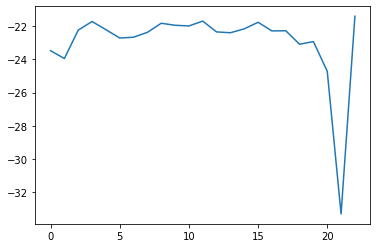

[array([-23.469566], dtype=float32),
 array([-23.942469], dtype=float32),
 array([-22.227732], dtype=float32),
 array([-21.70706], dtype=float32),
 array([-22.19797], dtype=float32),
 array([-22.704567], dtype=float32),
 array([-22.65512], dtype=float32),
 array([-22.361649], dtype=float32),
 array([-21.81259], dtype=float32),
 array([-21.934357], dtype=float32),
 array([-21.975374], dtype=float32),
 array([-21.682589], dtype=float32),
 array([-22.335127], dtype=float32),
 array([-22.385609], dtype=float32),
 array([-22.15032], dtype=float32),
 array([-21.754286], dtype=float32),
 array([-22.273926], dtype=float32),
 array([-22.264004], dtype=float32),
 array([-23.078444], dtype=float32),
 array([-22.918688], dtype=float32),
 array([-24.707766], dtype=float32),
 array([-33.326923], dtype=float32),
 array([-21.388968], dtype=float32)]

In [28]:
pre_2023_2 = pre_2022_2.reshape(-1,1)
pre_train,_ =split_sequence(pre_2023_2,12)
pre_2023_2 = regressor.predict(pre_train,verbose=2)
pre_2023_real_2 = scaler.inverse_transform(pre_2023_2)
# print(pre_2022_real)
# plt.plot(pre_2022_real)
# plt.show()
aaa = []
for i in range(0,len(pre_2023_real_2),12):
    aaa.append(pre_2023_real_2[i])

plt.plot(aaa)
plt.show()
aaa